In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, resample
import os

In [3]:
directory_path_list = ["RawProcessedData"]
for directory_path in directory_path_list:
    for file in os.listdir(f"./{directory_path}"):
        os.remove(os.path.join(directory_path, file))

In [4]:
def plot(data):
    fig,axes = plt.subplots(nrows=1,ncols=3,sharey=True,figsize=(15,5))
    axes[0].plot(data["gFx"],"blue")
    axes[1].plot(data["gFy"],"red")
    axes[2].plot(data["gFz"],"green")
    plt.show()

In [5]:
def trim_data(data):
    trimmed_data = data.drop(data.index[:250])
    trimmed_data = trimmed_data.drop(trimmed_data.index[500:])
    trimmed_data = trimmed_data.reset_index()
    trimmed_data = trimmed_data.drop("index",axis = 1)
    return trimmed_data

Data 2



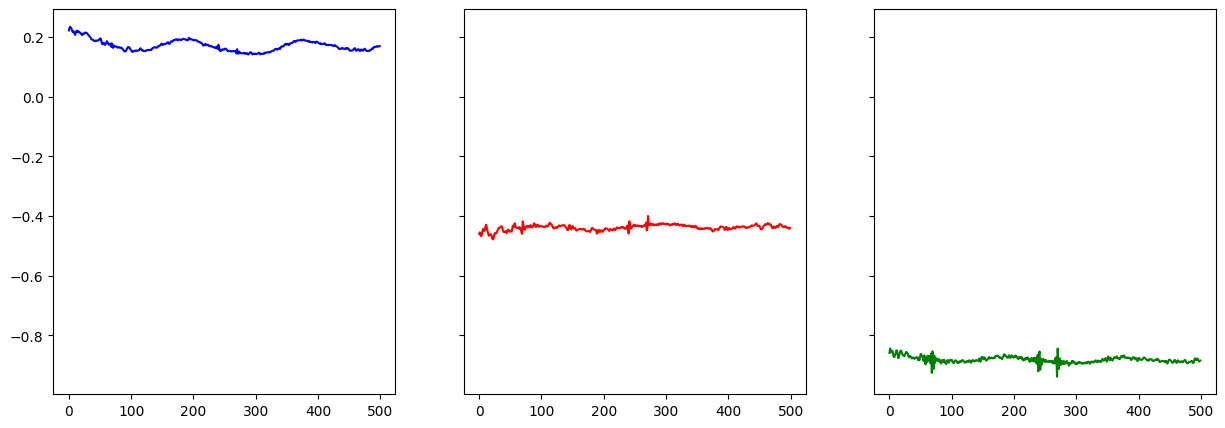

Data 3



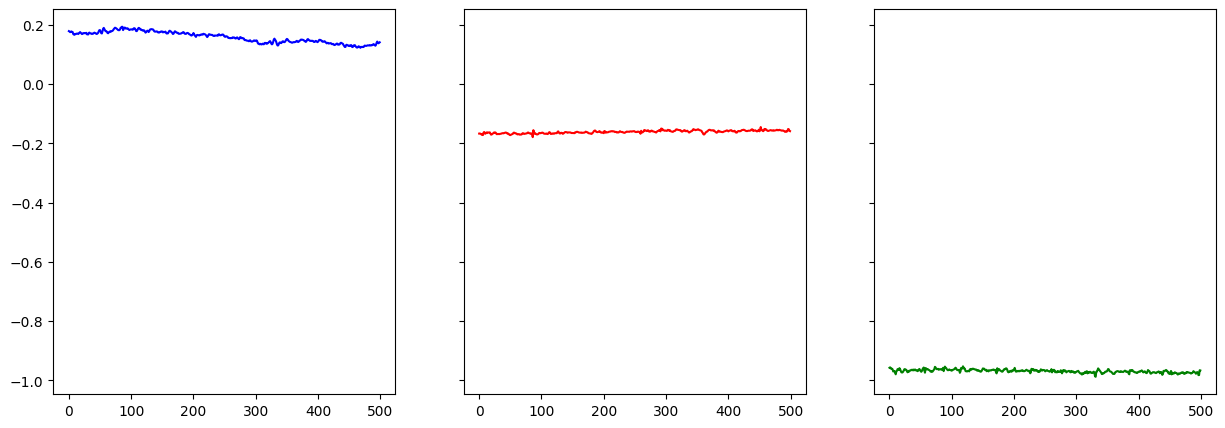

Data 4



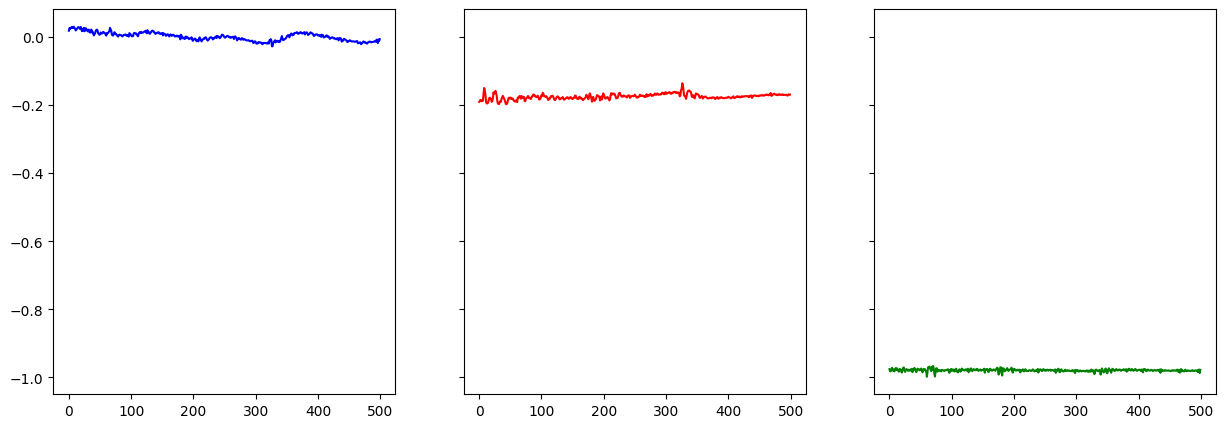

Data 5



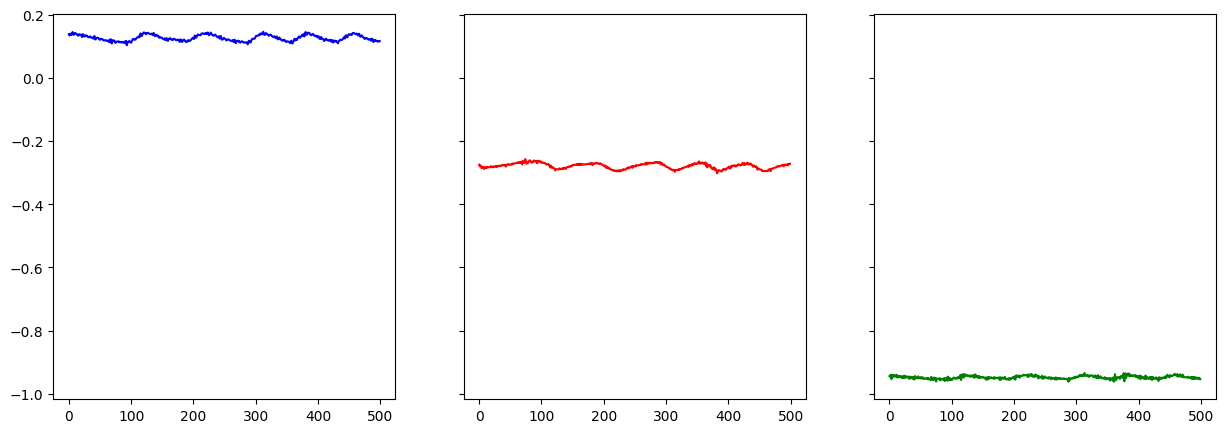

Data 6



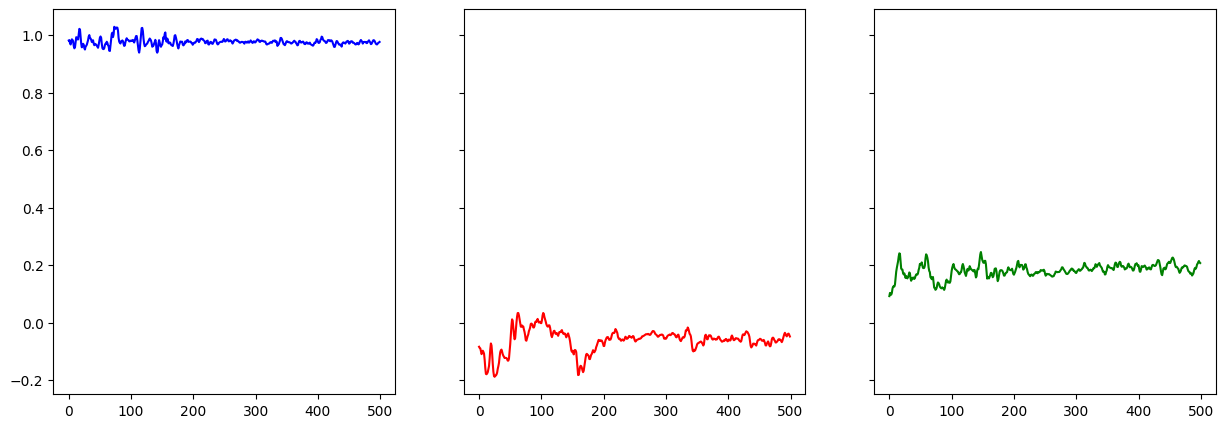

Data 7



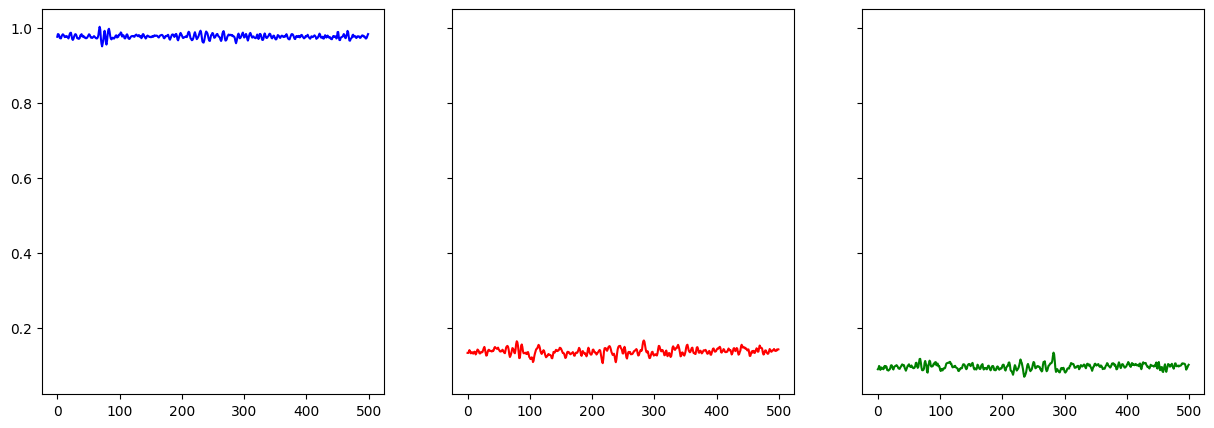

Data 8



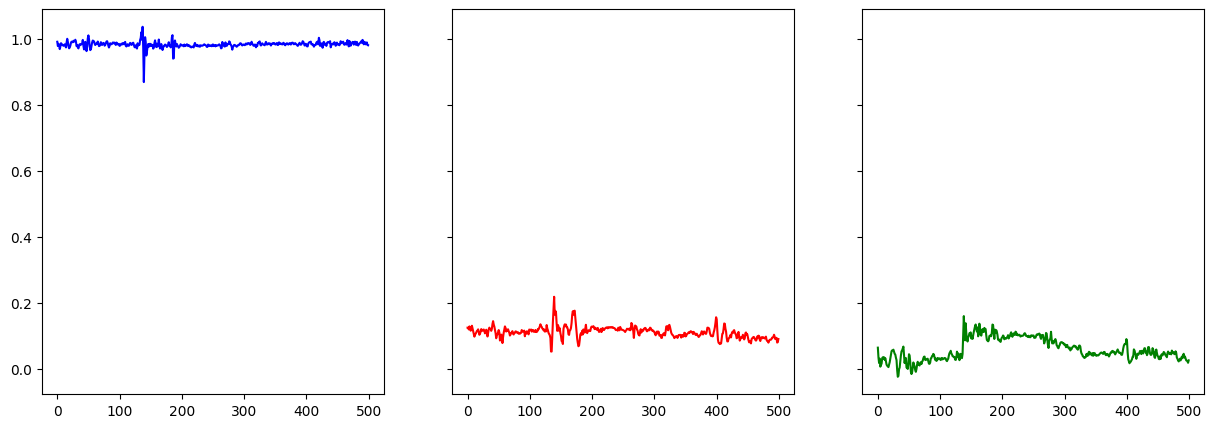

Data 9



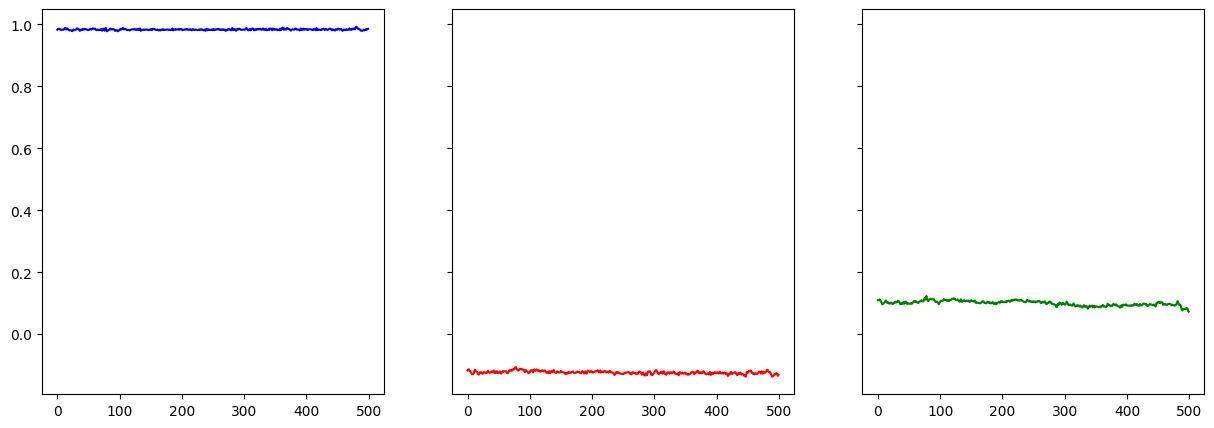

Data 10



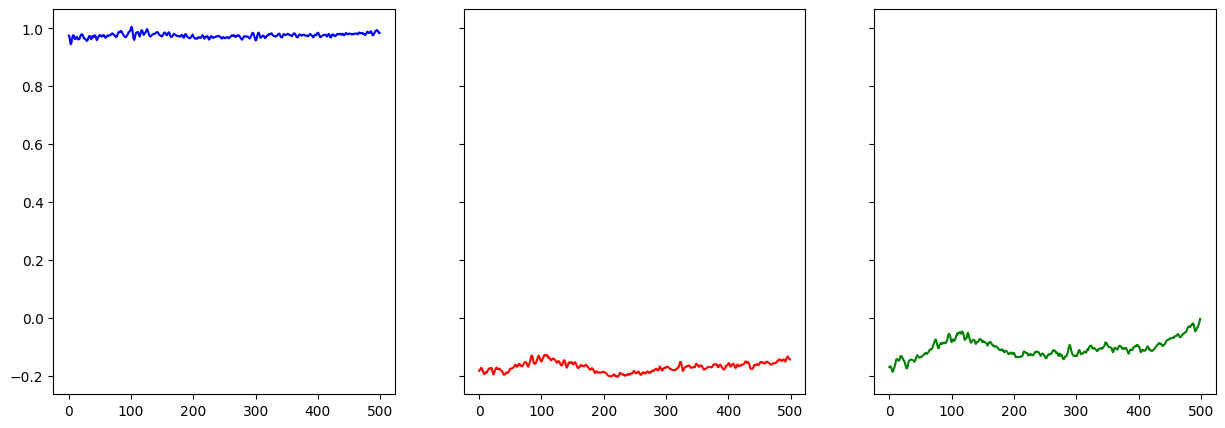

Data 11



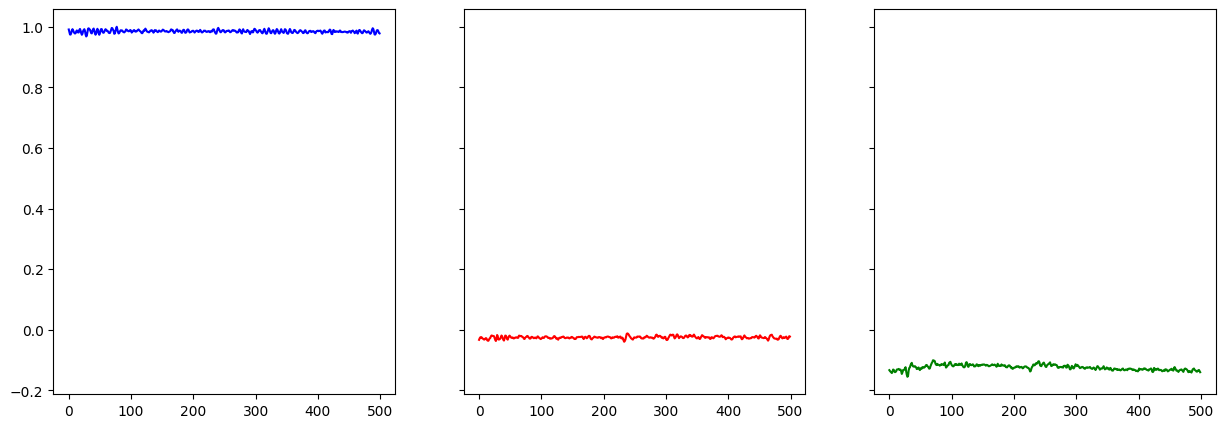

Data 12



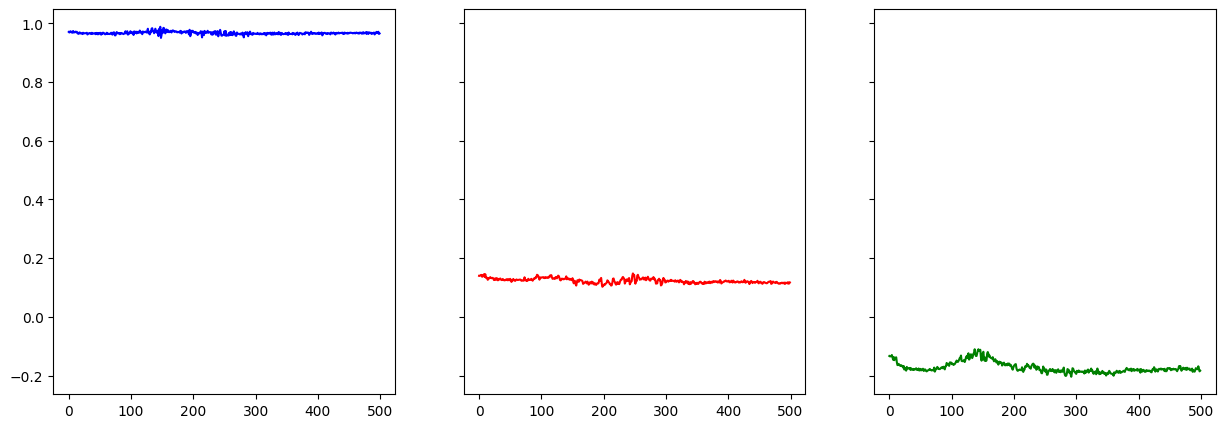

Data 13



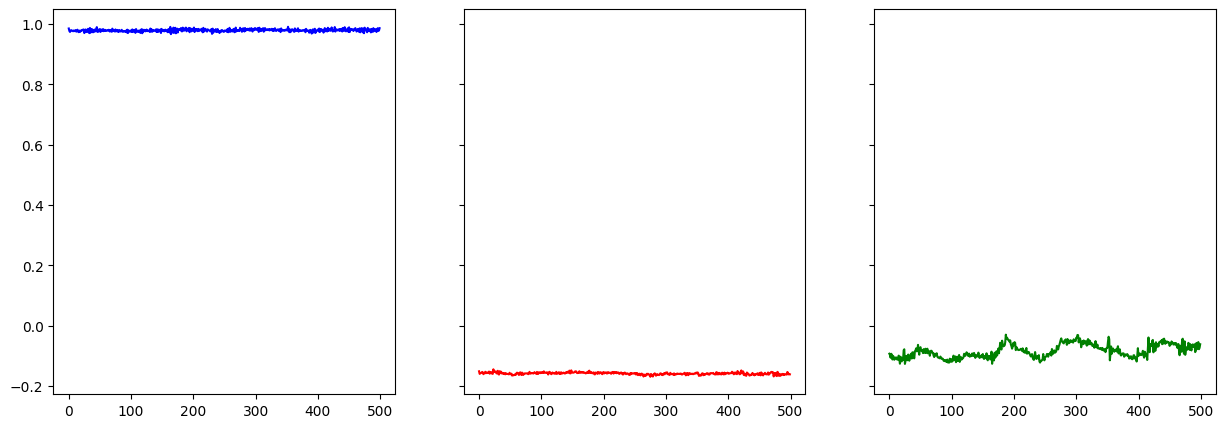

Data 14



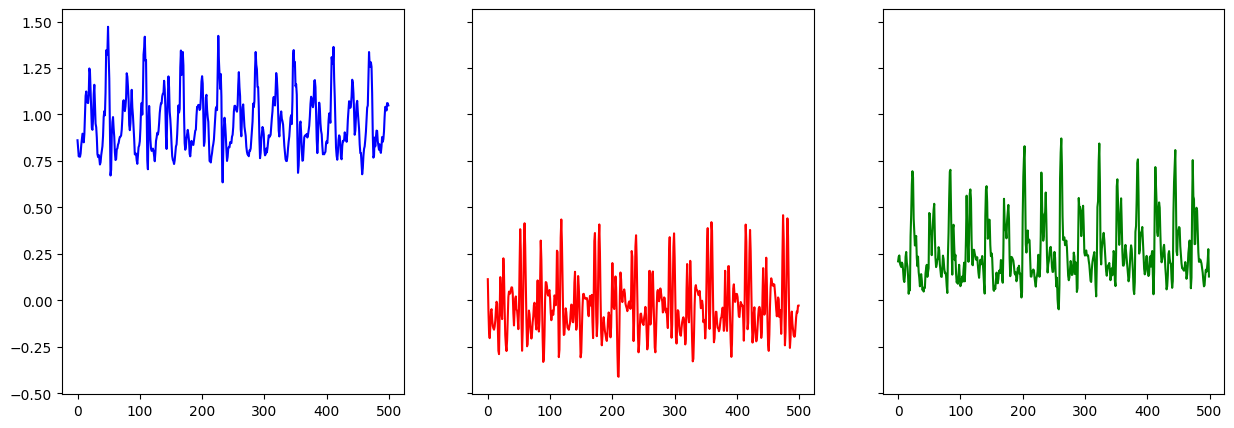

Data 15



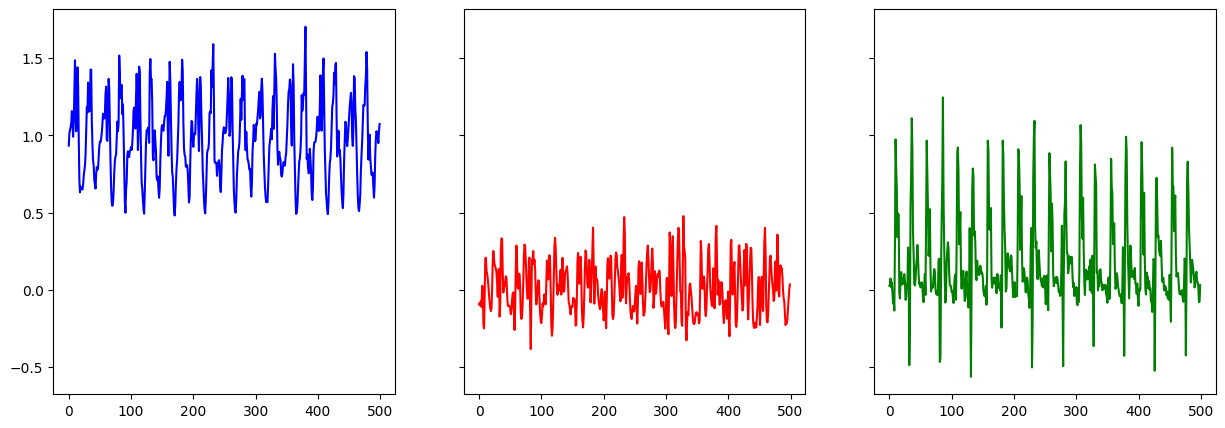

Data 16



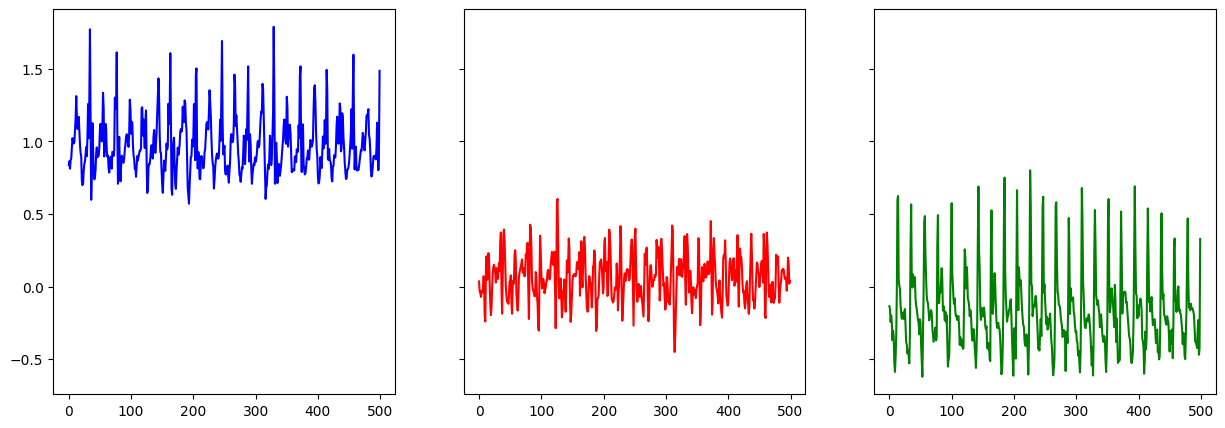

Data 17



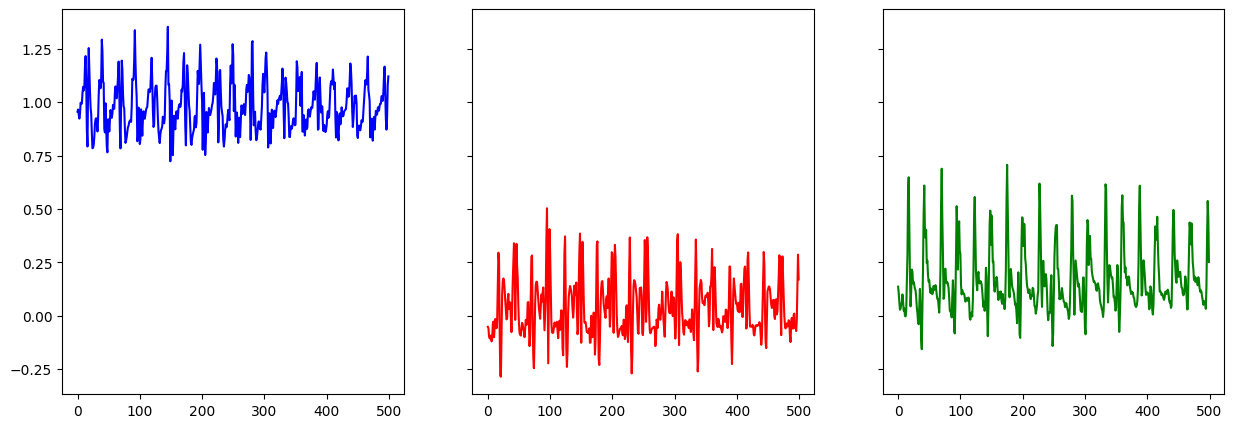

Data 18



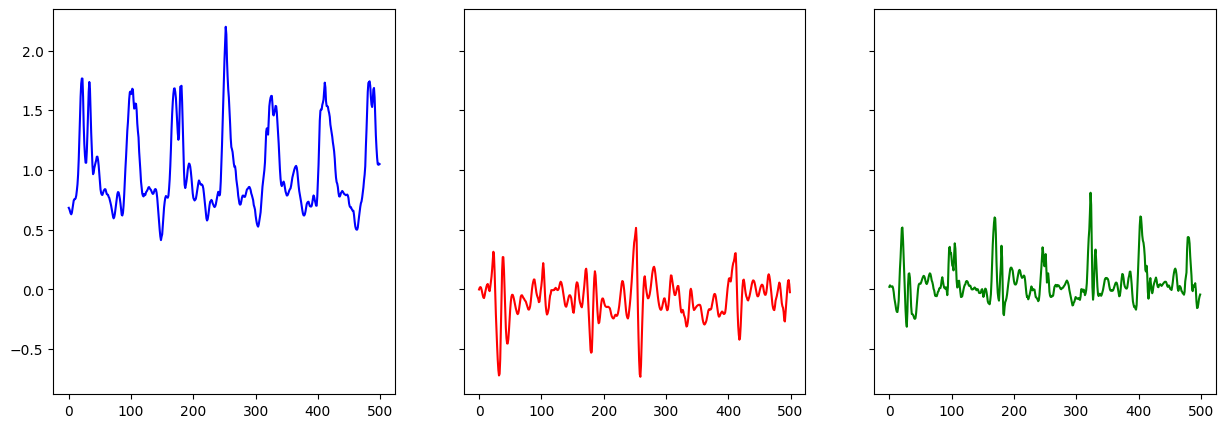

Data 19



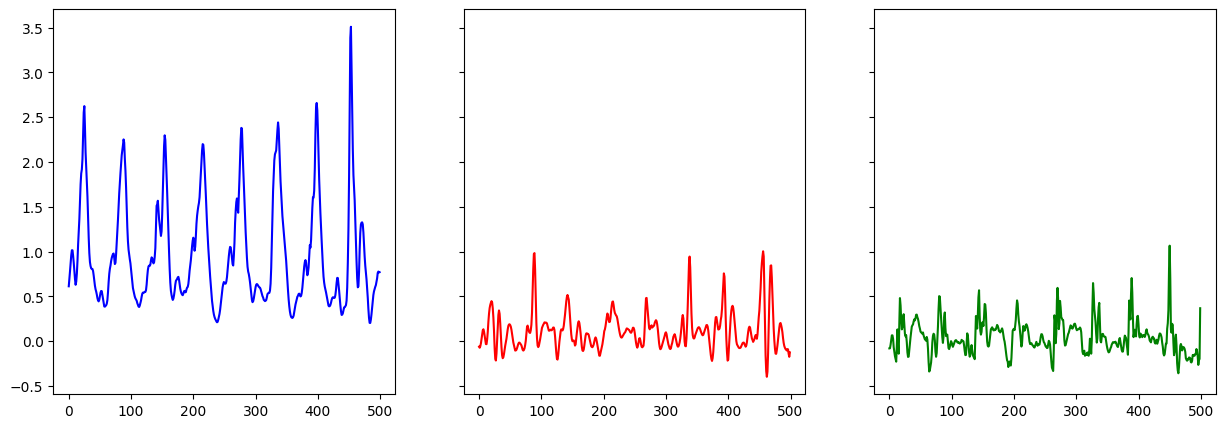

Data 20



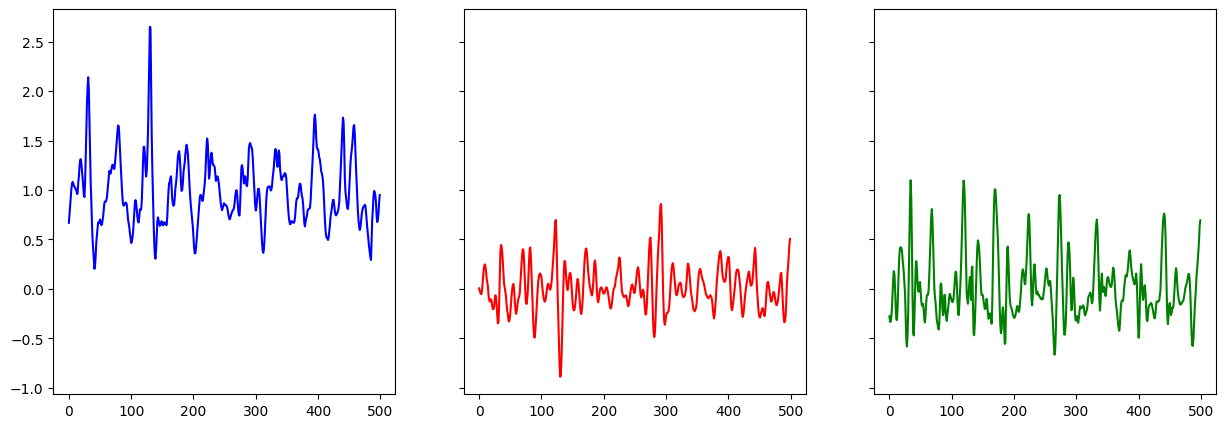

Data 21



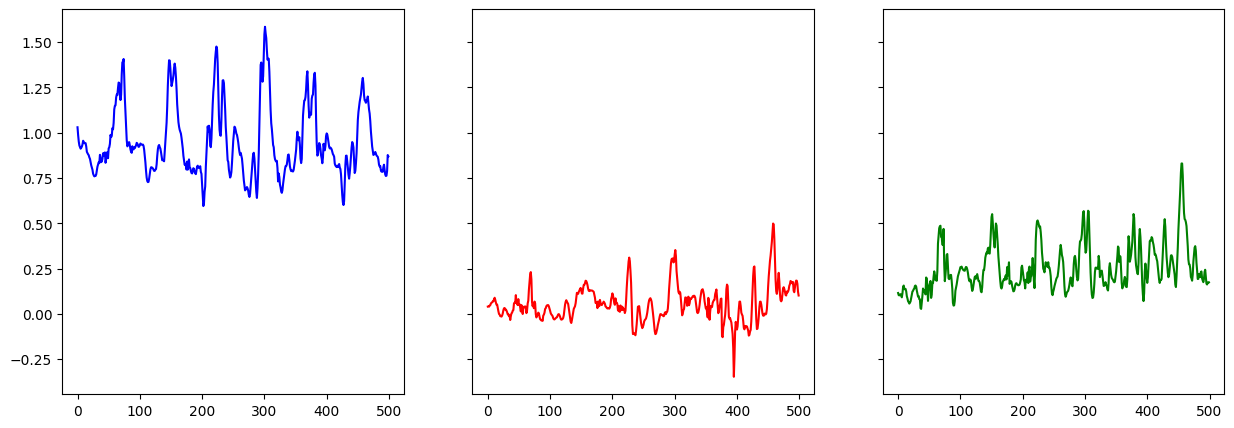

Data 22



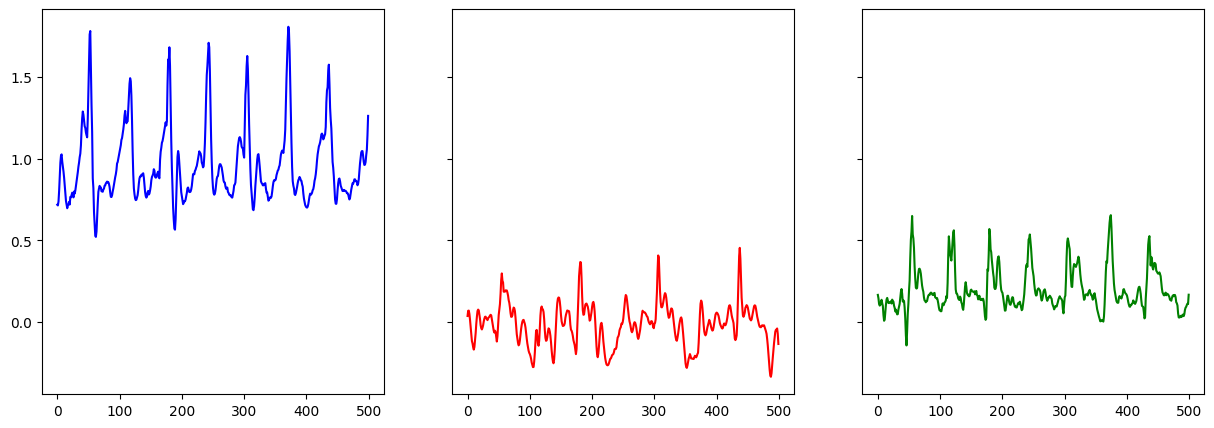

Data 23



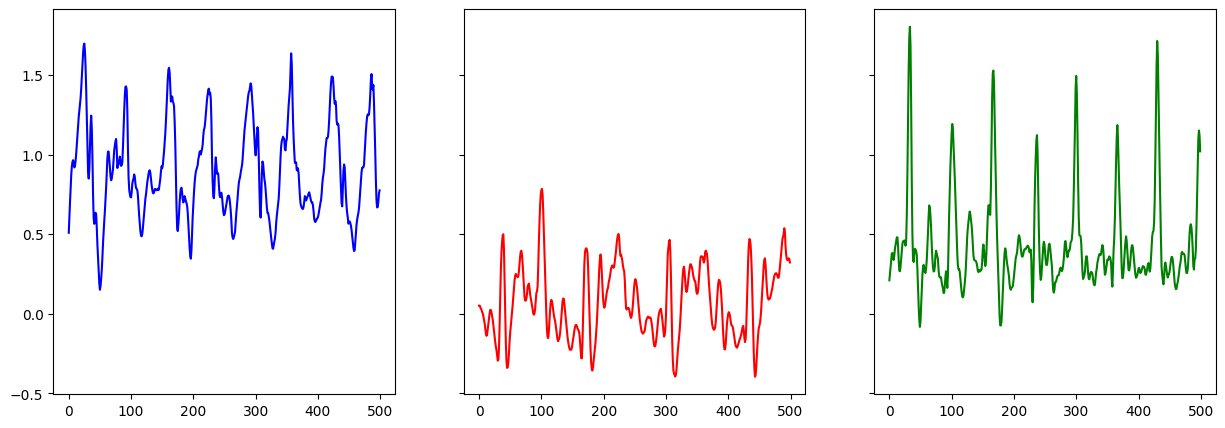

Data 24



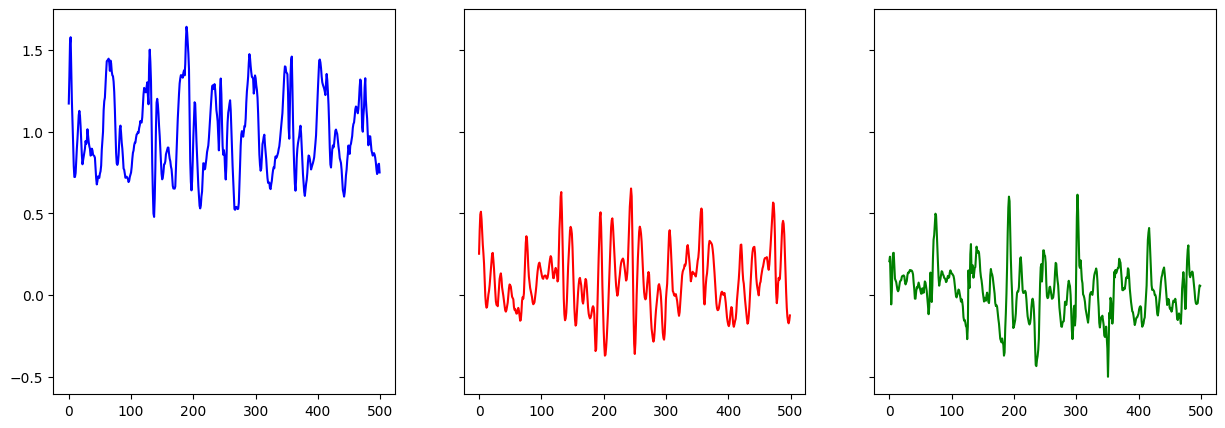

Data 25



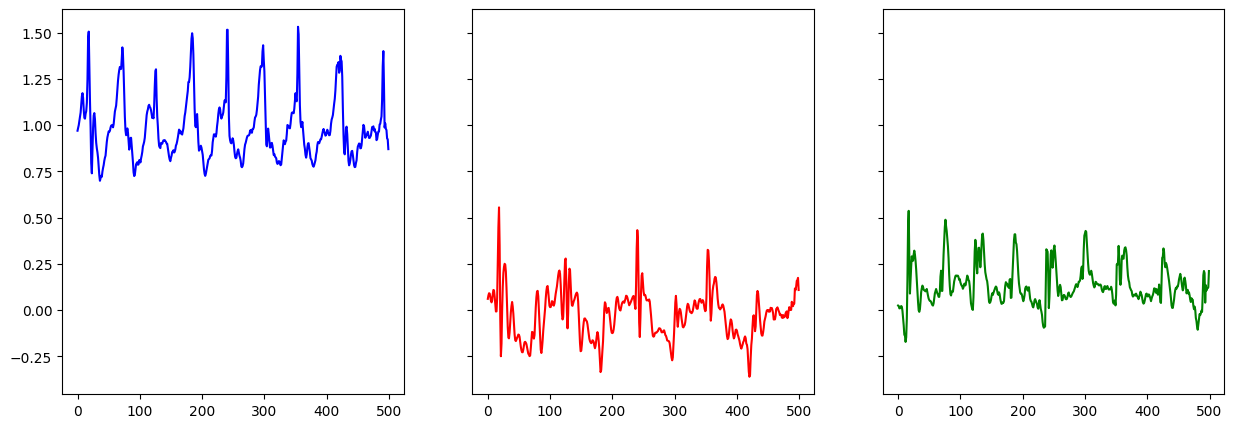

In [11]:
import os
import pandas as pd

directory_path = "./Data"

for i, file in enumerate(os.listdir(directory_path)):
    full_path = os.path.join(directory_path, file)

    if os.path.isfile(full_path):
        try:
            df = pd.read_csv(full_path)
            data = df[["gFx", "gFy", "gFz"]]
            print(f"Data {i+1}\n")

            with open("./RawProcessedData/y_data_test.txt", "a") as output_file:
                if (file.startswith("WU")):
                    output_file.write("2\n")
                elif (file.startswith("WD")):
                    output_file.write("3\n")
                elif (file.startswith("W")):
                    output_file.write("1\n")
                elif (file.startswith("Sit")):
                    output_file.write("4\n")
                elif (file.startswith("S")):
                    output_file.write("5\n")
                elif (file.startswith("L")):
                    output_file.write("6\n")
                else:
                    pass
                
            resampled_data = pd.DataFrame()
            for column in data.columns:
                resampled_data[column] = resample(data[column], 1000)

            trimmed_data = trim_data(resampled_data)

            trimmed_data_array = np.array(trimmed_data)
            
            plot(trimmed_data)

            
        except Exception as e:
            print(f"Skipping file {file} due to error: {e}")